In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
household = pd.read_csv('./가구원수별 가구수 통계.txt', sep='\t', encoding='utf8')
household.head()

,기간,구분,일반가구수,가구원수별 가구수,가구원수별 가구수.1,가구원수별 가구수.2,가구원수별 가구수.3,가구원수별 가구수.4,가구원수별 가구수.5,가구원수별 가구수.6,평균가구원수
0,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
1,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3
2,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
3,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
4,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2


In [3]:
household = household.rename(columns=household.iloc[0])
household.head()

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
1,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3
2,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
3,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
4,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2


In [4]:
household = household.drop(household.index[[0,1]])
household.head()

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
2,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
3,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
4,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
5,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3
6,2019,광진구,"149,905","58,714","35,678","28,054","21,454","4,711","1,006",288,2.2


In [5]:
household = household.rename(columns = {'구분':'구별'})
household.head()

,기간,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
2,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
3,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
4,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
5,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3
6,2019,광진구,"149,905","58,714","35,678","28,054","21,454","4,711","1,006",288,2.2


In [6]:
del household['기간']

In [7]:
household = household.set_index('구별')
household.head()

,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
구별,,,,,,,,,
종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3
광진구,"149,905","58,714","35,678","28,054","21,454","4,711","1,006",288,2.2


In [8]:
household['일반가구수'] = household['일반가구수'].str.replace(',','')
household['1인'] = household['1인'].str.replace(',','')
household['2인'] = household['2인'].str.replace(',','')
household['3인'] = household['3인'].str.replace(',','')
household['4인'] = household['4인'].str.replace(',','')
household['5인'] = household['5인'].str.replace(',','')
household['6인'] = household['6인'].str.replace(',','')
household['7인 이상'] = household['7인 이상'].str.replace(',','')
household.head()

,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
구별,,,,,,,,,
종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
중구,54496,22078,14578,9540,6292,1533,373,102,2.1
용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
성동구,122770,41488,32125,25634,18379,4014,877,253,2.3
광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2


In [9]:
household[['일반가구수', '1인', '2인', '3인', '4인', '5인', '6인', '7인 이상']] = household[['일반가구수', '1인', '2인', '3인', '4인', '5인', '6인', '7인 이상']].astype(int)
household[['평균가구원수']] = household[['평균가구원수']].astype(float)
household.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일반가구수   25 non-null     int32  
 1   1인      25 non-null     int32  
 2   2인      25 non-null     int32  
 3   3인      25 non-null     int32  
 4   4인      25 non-null     int32  
 5   5인      25 non-null     int32  
 6   6인      25 non-null     int32  
 7   7인 이상   25 non-null     int32  
 8   평균가구원수  25 non-null     float64
dtypes: float64(1), int32(8)
memory usage: 1.2+ KB


In [10]:
# 4인이상가구는 합치기
household['4인 이상'] = household['4인']+household['5인']+household['6인']+household['7인 이상']
del household['4인']
del household['5인']
del household['6인']
del household['7인 이상']

In [11]:
household = household[['일반가구수', '1인', '2인', '3인', '4인 이상', '평균가구원수']]
household.head()

,일반가구수,1인,2인,3인,4인 이상,평균가구원수
구별,,,,,,
종로구,62652,24671,16208,11154,10619,2.2
중구,54496,22078,14578,9540,8300,2.1
용산구,93177,35148,25164,17439,15426,2.2
성동구,122770,41488,32125,25634,23523,2.3
광진구,149905,58714,35678,28054,27459,2.2


In [12]:
household.columns[1:-1]

Index(['1인', '2인', '3인', '4인 이상'], dtype='object')

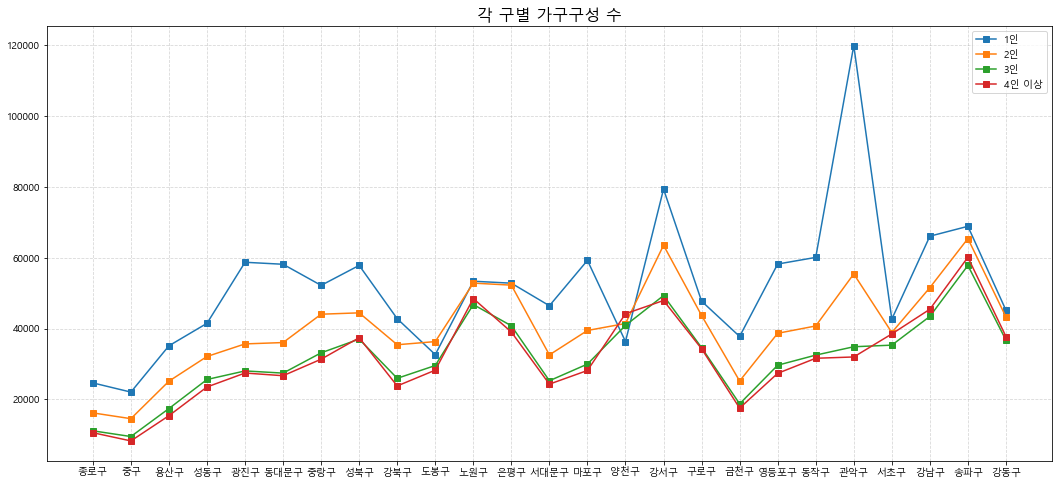

In [13]:
plt.figure(figsize=(18,8))
x = household.index
for column in household.columns[1:-1]:
    y = household[f'{column}']
    plt.plot(x, y, label=column, marker='s')
plt.legend()
plt.title('각 구별 가구구성 수', fontsize=16)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

In [14]:
population = pd.read_csv('./서울시 인구현황.txt', sep='\t', encoding='utf8', header=2)
population = population[['자치구', '계', '계.1', '계.2', '65세이상고령자']]
population.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [15]:
population.rename(columns={
    population.columns[0]:'구별',
    population.columns[1]:'인구수',
    population.columns[2]:'한국인',
    population.columns[3]:'외국인',
    population.columns[4]:'고령자'}, inplace=True)

population.head()

,구별,인구수,한국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [16]:
population = population.drop(population.index[[0]])
population.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"
5,광진구,"361,923","348,064","13,859","50,047"


In [17]:
population = population.set_index('구별')
population.head()

,인구수,한국인,외국인,고령자
구별,,,,
종로구,"159,842","149,952","9,890","28,396"
중구,"135,321","125,800","9,521","24,265"
용산구,"244,953","229,786","15,167","39,995"
성동구,"302,695","295,591","7,104","45,372"
광진구,"361,923","348,064","13,859","50,047"


In [18]:
population['인구수'] = population['인구수'].str.replace(',','')
population['한국인'] = population['한국인'].str.replace(',','')
population['외국인'] = population['외국인'].str.replace(',','')
population['고령자'] = population['고령자'].str.replace(',','')
population.head()

,인구수,한국인,외국인,고령자
구별,,,,
종로구,159842,149952,9890,28396
중구,135321,125800,9521,24265
용산구,244953,229786,15167,39995
성동구,302695,295591,7104,45372
광진구,361923,348064,13859,50047


In [19]:
population = population.astype(int)
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   인구수     25 non-null     int32
 1   한국인     25 non-null     int32
 2   외국인     25 non-null     int32
 3   고령자     25 non-null     int32
dtypes: int32(4)
memory usage: 600.0+ bytes


In [20]:
household.head()

,일반가구수,1인,2인,3인,4인 이상,평균가구원수
구별,,,,,,
종로구,62652,24671,16208,11154,10619,2.2
중구,54496,22078,14578,9540,8300,2.1
용산구,93177,35148,25164,17439,15426,2.2
성동구,122770,41488,32125,25634,23523,2.3
광진구,149905,58714,35678,28054,27459,2.2


In [21]:
data_result = pd.merge(household, population, on='구별')
data_result.head()

,일반가구수,1인,2인,3인,4인 이상,평균가구원수,인구수,한국인,외국인,고령자
구별,,,,,,,,,,
종로구,62652,24671,16208,11154,10619,2.2,159842,149952,9890,28396
중구,54496,22078,14578,9540,8300,2.1,135321,125800,9521,24265
용산구,93177,35148,25164,17439,15426,2.2,244953,229786,15167,39995
성동구,122770,41488,32125,25634,23523,2.3,302695,295591,7104,45372
광진구,149905,58714,35678,28054,27459,2.2,361923,348064,13859,50047


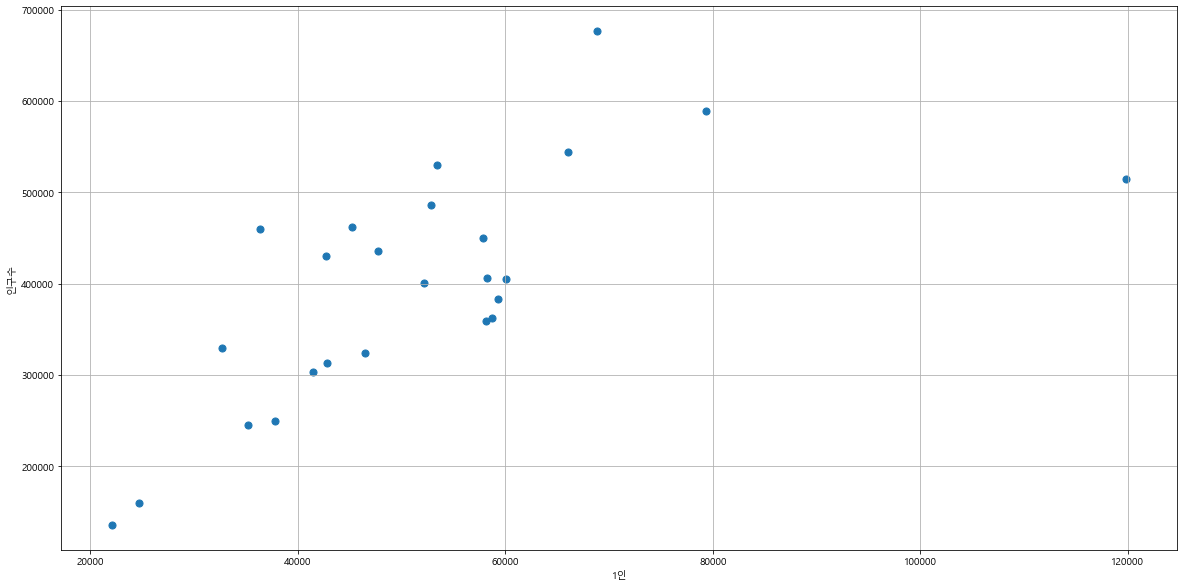

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(data_result['1인'], data_result['인구수'], s=50)
plt.xlabel('1인')
plt.ylabel('인구수')
plt.grid()
plt.show()

In [23]:
# 인구수가 제일 많은 구와 제일 적은 구의 가구구성비율

t_pop = data_result.sort_values(by='인구수', ascending=False)
b_pop = data_result.sort_values(by='인구수')

fig = plt.figure(figsize=(10, 8))

labels = ['1인 가구', '2인 가구', '3인 가구', '4인이상 가구']

ax1 = plt.subplot(1, 2, 1)
ax1.pie(t_pop[['1인', '2인', '3인', '4인 이상']].iloc[[0]], labels=labels, autopct='%1.1f%%', startangle=-10)
ax1.set_title(f'인구수가 제일 많은 구({t_pop.index[0]})')
plt.axis('equal')

ax2 = plt.subplot(1, 2, 2)
ax2.pie(b_pop[['1인', '2인', '3인', '4인 이상']].iloc[[0]], labels=labels, autopct='%1.1f%%', startangle=-60)
ax2.set_title(f'인구수가 제일 적은 구({b_pop.index[0]})')
plt.axis('equal')

fig.tight_layout()
plt.show()

NameError: name 't_pop' is not defined

# 강사님 깃허브

In [24]:
data_result['1인 비율'] = data_result['1인'] / data_result['일반가구수'] * 100
data_result['4인이상 비율'] = data_result['4인 이상'] / data_result['일반가구수'] * 100
data_result['외국인비율'] = data_result['외국인'] / data_result['인구수'] * 100
data_result['고령자비율'] = data_result['고령자'] / data_result['인구수'] * 100
data_result = data_result[['일반가구수', '1인', '4인 이상', '1인 비율', '평균가구원수', '4인이상 비율', '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율']]
data_result.head()

,일반가구수,1인,4인 이상,1인 비율,평균가구원수,4인이상 비율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
종로구,62652,24671,10619,39.377833,2.2,16.949180,159842,149952,9890,28396,6.187360,17.765043
중구,54496,22078,8300,40.513065,2.1,15.230476,135321,125800,9521,24265,7.035863,17.931437
용산구,93177,35148,15426,37.721755,2.2,16.555588,244953,229786,15167,39995,6.191800,16.327622
성동구,122770,41488,23523,33.793272,2.3,19.160218,302695,295591,7104,45372,2.346917,14.989346
광진구,149905,58714,27459,39.167473,2.2,18.317601,361923,348064,13859,50047,3.829268,13.828079


In [49]:
df = data_result.copy()
df

,일반가구수,1인,2인,3인,4인 이상,평균가구원수,인구수,한국인,외국인,고령자
구별,,,,,,,,,,
종로구,62652,24671,16208,11154,10619,2.2,159842,149952,9890,28396
중구,54496,22078,14578,9540,8300,2.1,135321,125800,9521,24265
용산구,93177,35148,25164,17439,15426,2.2,244953,229786,15167,39995
성동구,122770,41488,32125,25634,23523,2.3,302695,295591,7104,45372
광진구,149905,58714,35678,28054,27459,2.2,361923,348064,13859,50047


In [25]:
# 상관관계 분석
df_ana = df[['1인 비율', '4인이상 비율', '평균가구원수', '인구수', '외국인비율', '고령자비율']]
df_corr = df_ana.corr() #corr = 여러가지 상관관계를
df_corr

,1인 비율,4인이상 비율,평균가구원수,인구수,외국인비율,고령자비율
1인 비율,1.000000,-0.949540,-0.973676,-0.414238,0.590722,0.108239
4인이상 비율,-0.949540,1.000000,0.978908,0.536251,-0.623285,-0.326916
평균가구원수,-0.973676,0.978908,1.000000,0.485633,-0.634757,-0.191146
인구수,-0.414238,0.536251,0.485633,1.000000,-0.617271,-0.544650
외국인비율,0.590722,-0.623285,-0.634757,-0.617271,1.000000,0.139582
고령자비율,0.108239,-0.326916,-0.191146,-0.544650,0.139582,1.000000


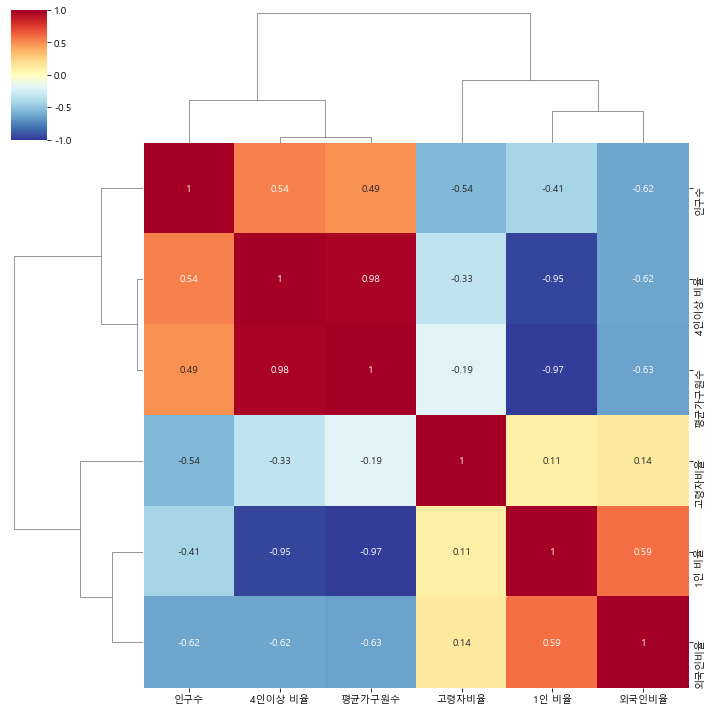

In [26]:
sns.clustermap(df_corr, 
               annot = True,        # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',   # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)

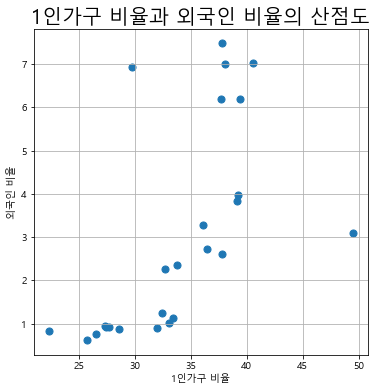

In [28]:
# 1인 가구 비율과 외국인 비율의 산점도
plt.figure(figsize=(6,6))
plt.scatter(df['1인 비율'], df['외국인비율'], s=50)
plt.grid(True)
plt.title('1인가구 비율과 외국인 비율의 산점도', fontsize=20)
plt.xlabel('1인가구 비율')
plt.ylabel('외국인 비율')
plt.show()

In [28]:
# 산점도 위에 상관관계를 나타내는 선 그리기
fp1 = np.polyfit(df['1인 비율'], df['외국인비율'], 1)
fp1

array([ 0.23480781, -4.92658962])

In [29]:
fx = np.array([20, 50])
f1 = np.poly1d(fp1) # poly1d = (입력 배열, 근 설정, 변수명)으로 다항식을 생성, 근설정은 True라면 근으로, False라면 계수로 사용한다.(defaut=false) 변수명 default=x / 입력하면 1x+2x.. 뭐 이런거의 x가 정한 변수명으로 설정된다.
fy = f1(fx)
fy

array([-0.23043343,  6.81380087])

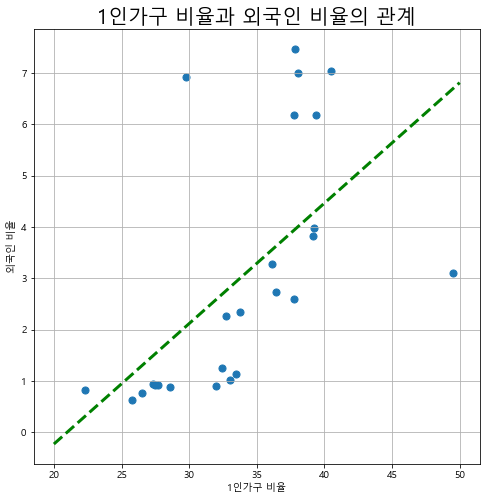

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(df['1인 비율'], df['외국인비율'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g') # 산점도 위의 상관관계 선
plt.grid(True)
plt.title('1인가구 비율과 외국인 비율의 관계', fontsize=20)
plt.xlabel('1인가구 비율')
plt.ylabel('외국인 비율')
plt.show()

In [31]:
# 오차 열 생성
df['오차'] = np.abs(df['외국인비율'] - f1(df['1인 비율']))
df_sort = df.sort_values('오차', ascending=False)
df_sort.head()

,일반가구수,1인,4인 이상,1인 비율,평균가구원수,4인이상 비율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,,,,,
구로구,160378,47740,34314,29.767175,2.4,21.395703,435751,405579,30172,69312,6.924138,15.906332,4.861162
관악구,242154,119863,31993,49.498666,2.0,13.211840,514555,498574,15981,78206,3.105790,15.198764,3.590293
영등포구,153923,58214,27377,37.820209,2.2,17.786166,405982,375630,30352,60826,7.476194,14.982438,3.522303
금천구,99315,37778,17559,38.038564,2.2,17.680109,249641,232157,17484,39361,7.003657,15.767041,2.998495
중구,54496,22078,8300,40.513065,2.1,15.230476,135321,125800,9521,24265,7.035863,17.931437,2.449668


In [24]:
plt.figure(figsize=(16,10))
plt.scatter(df['1인 비율'], df['외국인비율'], c=df['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(df_sort['1인 비율'][i]*1.005, df_sort['외국인비율'][i]*0.985,
             df_sort.index[i][:-1], fontsize=15)

plt.grid(True)
plt.title('1인가구 비율과 외국인 비율의 관계', fontsize=20)
plt.xlabel('1인가구 비율')
plt.ylabel('외국인 비율')
plt.colorbar()
plt.show()

NameError: name 'df' is not defined